# FabLog Data Visualisation

Visualisation for 210625 fab log data


In [1]:
LOG_PATH = "..\\FabLogs"

import os
file_names = os.listdir(LOG_PATH)
print(file_names)

['S01_0.txt', 'S01_1.txt', 'S01_2.txt', 'S01_3.txt', 'S01_4.txt', 'S01_5.txt', 'S01_6.txt', 'S01_7.txt', 'S01_8.txt', 'S01_9.txt']


In [2]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime

def string_to_datetime(string):
    day, month, year, hour, minute, second = [int(t) for t in string.split(';')[1:-1]]
    if year == 0: return
    return datetime(year, month, day, hour, minute, second, 0)

logs = []
# compute log lengths (how many entries with non-zero sensor values?)
for filename in file_names:
    log_lines = []
    with open(os.path.join(LOG_PATH, filename)) as f:
        entryCount = 0
        incompleteCounter = 0
        for line in f.readlines():
            
            # start a new log per each time stamp found
            if entryCount == 0 and line[0] == "0" and string_to_datetime(line):
                log = {}
                log["datetime"] = string_to_datetime(line)
                entryCount = 1
            elif entryCount == 1 and line[0] == "1":
                log["TCP"] = [float(i) for i in line.split(';')[1:-1]]
                entryCount = 0 if sum(log["TCP"]) == 0 else 2
            elif entryCount == 2 and line[0] == "2":
                log["velocity"], log["tensionScaled"], log["tensionRaw"], log["E2"] = [float(i) for i in line.split(';')[1:-1]]
#                 entryCount = 0 if log["tensionScaled"] == 0 else 3
                entryCount = 0 if sum([float(i) for i in line.split(';')[1:-1]]) == 0 else 3
            elif entryCount == 3 and line[0] == "3":
                log["Axis"] = [float(i) for i in line.split(';')[1:-1]]
                entryCount = 0 if sum(log["Axis"]) == 0 else 4
            elif entryCount == 4 and line[0] == "4":
                log["Torque"] = [float(i) for i in line.split(';')[1:-1]]
                entryCount = 0 if sum(log["Torque"]) == 0 else 5
            # only add the log when all five entries are complete
            if entryCount == 5:
                log_lines.append(log)
                entryCount = 0
            else:
                incompleteCounter += 1
        
        print (f"{filename} : {len(log_lines)} complete log lines, {incompleteCounter} lines incomplete")
    logs.append(log_lines)



S01_0.txt : 14091 complete log lines, 85518 lines incomplete
S01_1.txt : 10392 complete log lines, 89217 lines incomplete
S01_2.txt : 9285 complete log lines, 90325 lines incomplete
S01_3.txt : 10545 complete log lines, 89064 lines incomplete
S01_4.txt : 14359 complete log lines, 85250 lines incomplete
S01_5.txt : 8288 complete log lines, 91322 lines incomplete
S01_6.txt : 8684 complete log lines, 90925 lines incomplete
S01_7.txt : 7361 complete log lines, 92249 lines incomplete
S01_8.txt : 9797 complete log lines, 89812 lines incomplete
S01_9.txt : 7814 complete log lines, 91796 lines incomplete


0:36:38
0:31:48
0:24:48
0:31:49
0:37:26
0:30:37
0:24:26
0:27:00
0:31:37
0:26:43


<IPython.core.display.Javascript object>


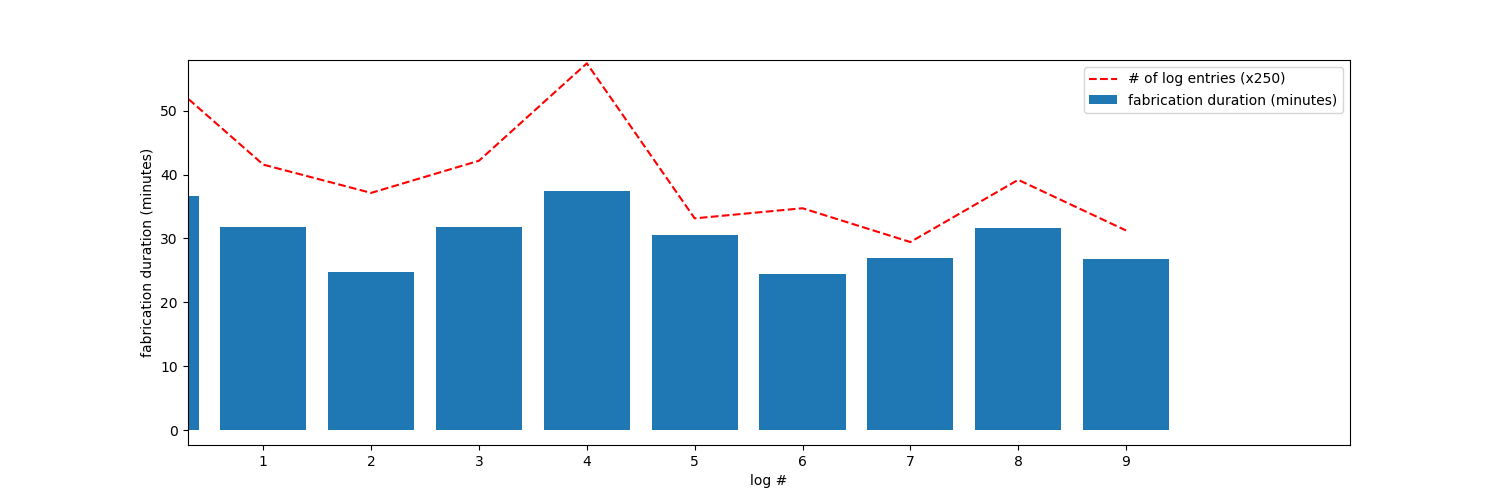

In [3]:
import matplotlib.colors as mColors

durations = []
tensions = []
for log_lines in logs:
    duration = log_lines[-1]["datetime"] - log_lines[0]["datetime"]
    print (duration)
    durations.append(duration.total_seconds()/60)

log_lengths = [len(l) for l in logs]
a = np.array([l/250 for l in log_lengths])
b = np.array(durations)
c = np.array([l/(d*6) for l, d in zip(log_lengths, durations)])

plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 10, 1))
plt.plot(a, linestyle="dashed", label = "# of log entries (x250)", c = "red")
# plt.plot(b, label="fabrication duration")
plt.bar(range(0,10), b, label="fabrication duration (minutes)")
# plt.plot(c, linestyle="dashed", label="log frequency (every 10 sec)", c='green')
plt.legend(loc="upper right")
plt.xlabel('log #')
plt.ylabel('fabrication duration (minutes)')
plt.show()    

<IPython.core.display.Javascript object>


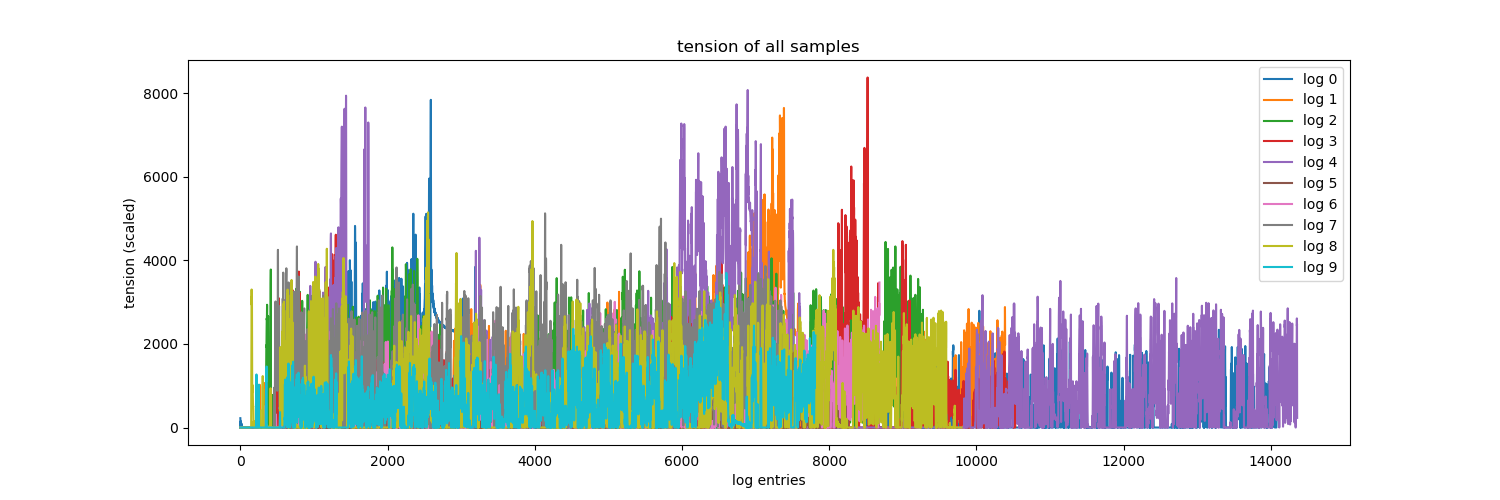

<IPython.core.display.Javascript object>


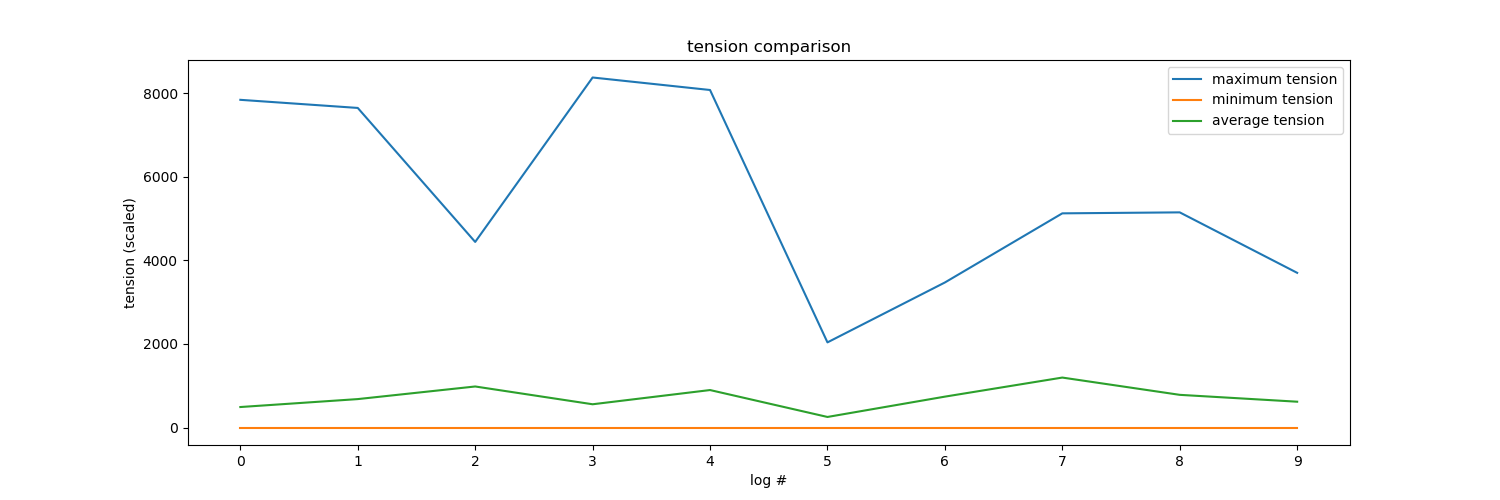

In [4]:
plt.figure(figsize=(15,5))
plt.title("tension of all samples")
for i in range(len(logs)):    
    tensionValues = [log["tensionScaled"] for log in logs[i]]
    plt.plot(np.array(tensionValues), label = f"log {i}")
plt.xlabel('log entries')
plt.ylabel('tension (scaled)')
plt.legend(loc="upper right")
plt.show()

maxTension = []
minTension = []
avgTension = []
for i in range(len(logs)):    
    tensionValues = [log["tensionScaled"] for log in logs[i]]
    maxTension.append(max(tensionValues))
    minTension.append(min(tensionValues))
    avgTension.append(sum(tensionValues)/len(tensionValues))

plt.figure(figsize=(15,5))
plt.title("tension comparison")
plt.xticks(np.arange(0, 10, 1))
plt.plot(np.array(maxTension), label = "maximum tension")
plt.plot(np.array(minTension), label = "minimum tension")
plt.plot(np.array(avgTension), label = "average tension")
plt.xlabel('log #')
plt.ylabel('tension (scaled)')
plt.legend(loc="upper right")
plt.show()

<IPython.core.display.Javascript object>


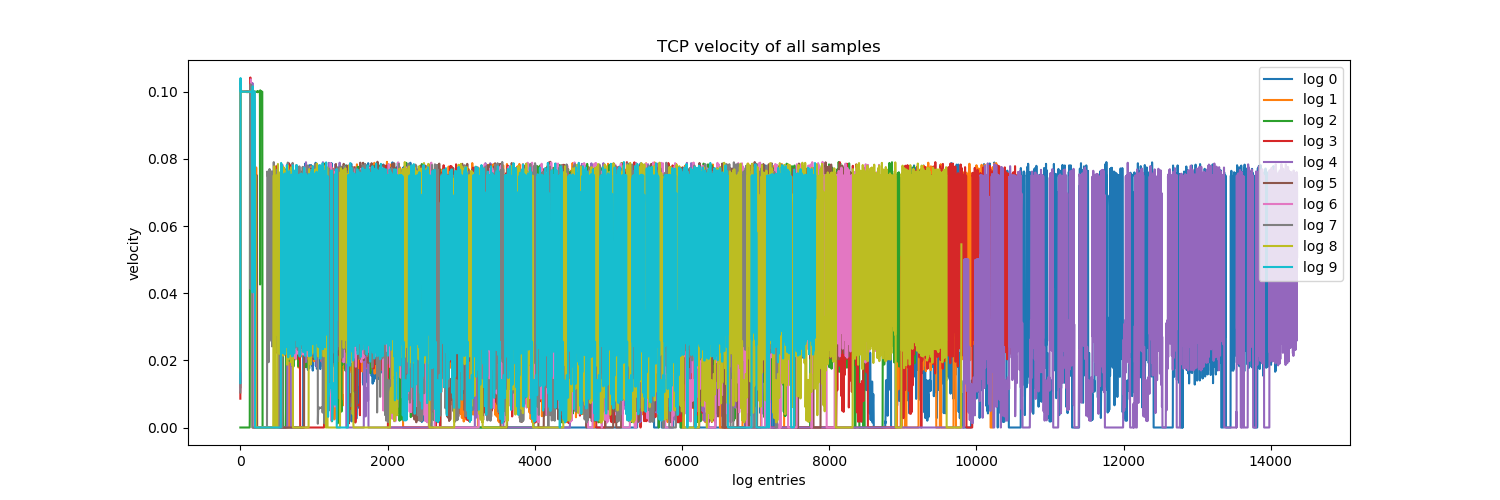

<IPython.core.display.Javascript object>


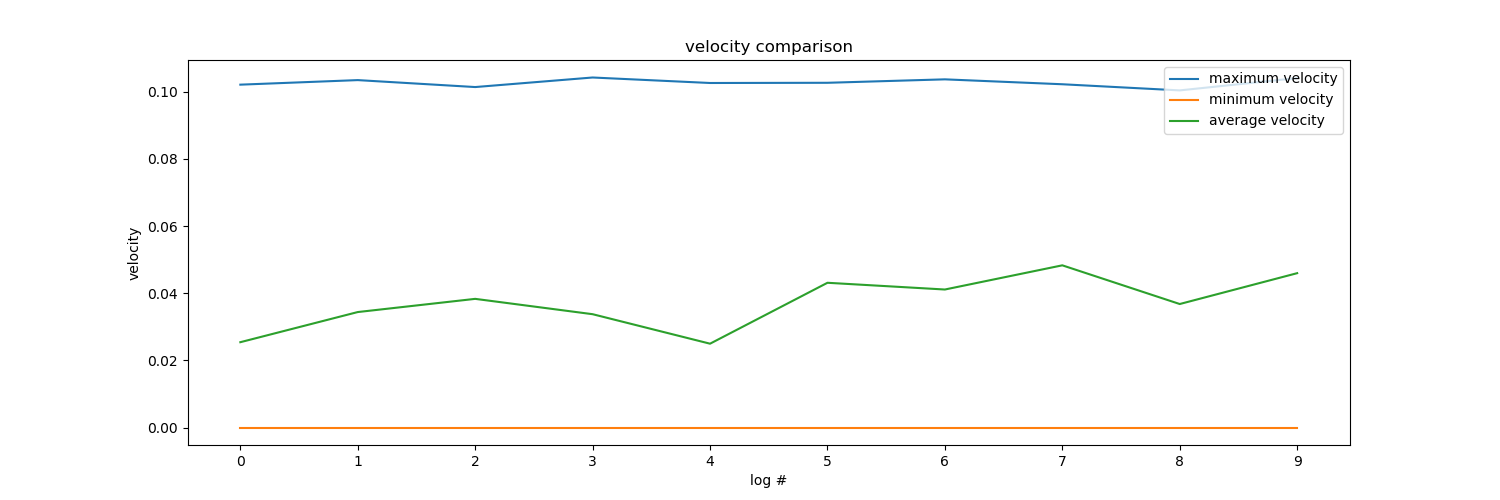

In [5]:
plt.figure(figsize=(15,5))
plt.title("TCP velocity of all samples")
for i in range(len(logs)):    
    tensionValues = [log["velocity"] for log in logs[i]]
    plt.plot(np.array(tensionValues), label = f"log {i}")
plt.xlabel('log entries')
plt.ylabel('velocity')
plt.legend(loc="upper right")
plt.show()

maxTension = []
minTension = []
avgTension = []
for i in range(len(logs)):    
    tensionValues = [log["velocity"] for log in logs[i]]
    maxTension.append(max(tensionValues))
    minTension.append(min(tensionValues))
    avgTension.append(sum(tensionValues)/len(tensionValues))

plt.figure(figsize=(15,5))
plt.title("velocity comparison")
plt.xticks(np.arange(0, 10, 1))
plt.plot(np.array(maxTension), label = "maximum velocity")
plt.plot(np.array(minTension), label = "minimum velocity")
plt.plot(np.array(avgTension), label = "average velocity")
plt.xlabel('log #')
plt.ylabel('velocity')
plt.legend(loc="upper right")
plt.show()